In [1]:
import sys
import csv

In [1]:
import numpy as np

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [38]:
iris=datasets.load_iris() #从datasets中导入数据
x=iris.data #导入输入数据
y=iris.target#导入测试数据

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)  #拆分训练集和验证集 顺便打乱数据排序

In [39]:
from sklearn.neighbors import KNeighborsClassifier #
knn=KNeighborsClassifier(n_neighbors=5) #选择knn邻近模型，返回一个模型对象
knn.fit(X_train,Y_train) #训练
knn.predict(X_test) #预测
knn.score(X_test,Y_test) #计算准确率


0.9555555555555556

In [40]:
#使用pickle 存储模型
import pickle
with open("knn.pickle","wb") as file_obj:  #存储模型 文件后缀为.pickle
    pickle.dump(knn, file_obj) 


In [41]:
with open("knn.pickle","rb") as file_obj: #导入模型
    knn2=pickle.load(file_obj)
    print(knn2.predict(X_train[0:1]))

[2]


In [45]:
#使用joblib 存储模型 
import joblib 
joblib.dump(knn2,'knn2.pkl') #保存模型 文件后缀为.pkl
knn3=joblib.load("knn2.pkl") #导入模型
print(knn3.predict(X_train[0:1]))

[2]


In [30]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5) 
scores=cross_val_score(knn,x,y,cv=5,scoring="accuracy") #交差验证 cv 验证折数
print(scores.mean()) #输出平均准确率

0.9733333333333334


In [24]:
from sklearn import preprocessing
a=np.array([[10,2.7,3.6],[-100,5,-2],[120,20,40]],dtype=np.float64)
print(a)
preprocessing.scale(a) #标准化

[[  10.     2.7    3.6]
 [-100.     5.    -2. ]
 [ 120.    20.    40. ]]
[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


In [37]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import  SVC
import matplotlib.pyplot as plt

digits=load_digits()
digit_x=digits.data
digit_y=digits.target
"""
train_sizes:训练节点，训练完成程度
train_loss,test_loss :与train_sizes对应的训练程度时的损失
"""
train_sizes,train_loss,test_loss=learning_curve(
    SVC(gamma=0.001),digit_x,digit_y,cv=10,scoring='neg_mean_squared_error',
    train_sizes=[0.1,0.25,0.5,0.75,1])
train_loss_mean=-np.mean(train_loss,axis=1)
test_loss_mean=-np.mean(test_loss,axis=1)
plt.plot(train_sizes,train_loss_mean,"o-",color="r",label="Training")
plt.plot(train_sizes,test_loss_mean,"o-",color="g",label="Cross-validation")


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-37-81504216bea3>, line 16)

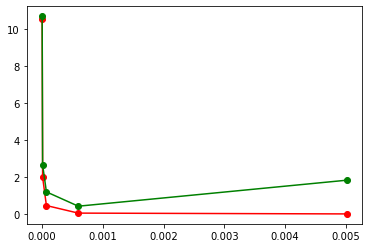

In [36]:
from sklearn.model_selection import validation_curve

param_range=np.logspace(-6,-2.3,5) #参数取值列表，logspace 默认以10为底产生等比数列
#验证曲线
train_loss,test_loss=validation_curve(
    SVC(),digit_x,digit_y,param_name="gamma",param_range=param_range,cv=10,scoring='neg_mean_squared_error')
train_loss_mean=-np.mean(train_loss,axis=1)
test_loss_mean=-np.mean(test_loss,axis=1)
plt.plot(param_range,train_loss_mean,"o-",color="r",label="Training")
plt.plot(param_range,test_loss_mean,"o-",color="g",label="Cross-validation")

In [15]:
#通过sklearn 提供的包生成测试数据
from sklearn.datasets import make_classification

test_data,test_target = make_classification(n_samples=6, n_features=5, n_informative=2, 
    n_redundant=2, n_classes=2, n_clusters_per_class=2, scale=1.0, 
    random_state=20)

# n_samples：指定样本数
# n_features：指定特征数
# n_classes：指定几分类
# random_state：随机种子，使得随机状可重
